<a href="https://colab.research.google.com/github/neelkanthrawat/mlph2023-Exercises/blob/main/Copy_of_sheet05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheet 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

# 2) Phase classification in $\phi^4$ theory

(a)

In [37]:
train = np.load('/content/lattice_train.npy')#np.load("data05/lattice_train.npy")
test = np.load('/content/lattice_test.npy')#np.load("data05/lattice_test.npy")
kappa = np.arange(0.24, 0.30, 0.0025)

L = 16
lattice_shape = (L,L)

train, test = torch.tensor(train), torch.tensor(test)
symmetric_phase_data, broken_phase_data = train[0,...], train[1,...]

In [ ]:
train.shape, test.shape

(torch.Size([2, 1000, 16, 16]), torch.Size([24, 100, 16, 16]))

In [ ]:
## let;s consider the first configuration for the broken and unbroken phase
train[0,:,:,:].shape, train[1,:,:,:].shape

(torch.Size([1000, 16, 16]), torch.Size([1000, 16, 16]))

In [ ]:
test.shape[0]

24

In [ ]:
(0.3-0.24)/test.shape[0]

0.0025

In [ ]:
0.24+ (24*0.0025)

0.3

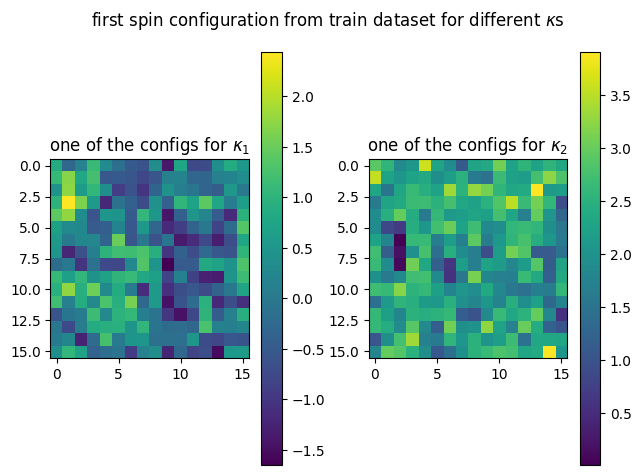

In [38]:
# TODO: Visualize lattice sides for different values of kappa
plt.suptitle(r"first spin configuration from train dataset for different $\kappa$s")
plt.subplot(1,2,1)
plt.imshow(train[0,0,:,:])
plt.colorbar()
plt.title(r'one of the configs for $\kappa_{1}$')# unbroken phase

plt.subplot(1,2,2)
plt.imshow(train[1,0,:,:])
plt.colorbar()
plt.title(r'one of the configs for $\kappa_{2}$')# broken phase
plt.tight_layout()
plt.show()

delta_kappa: 0.002608695652173913


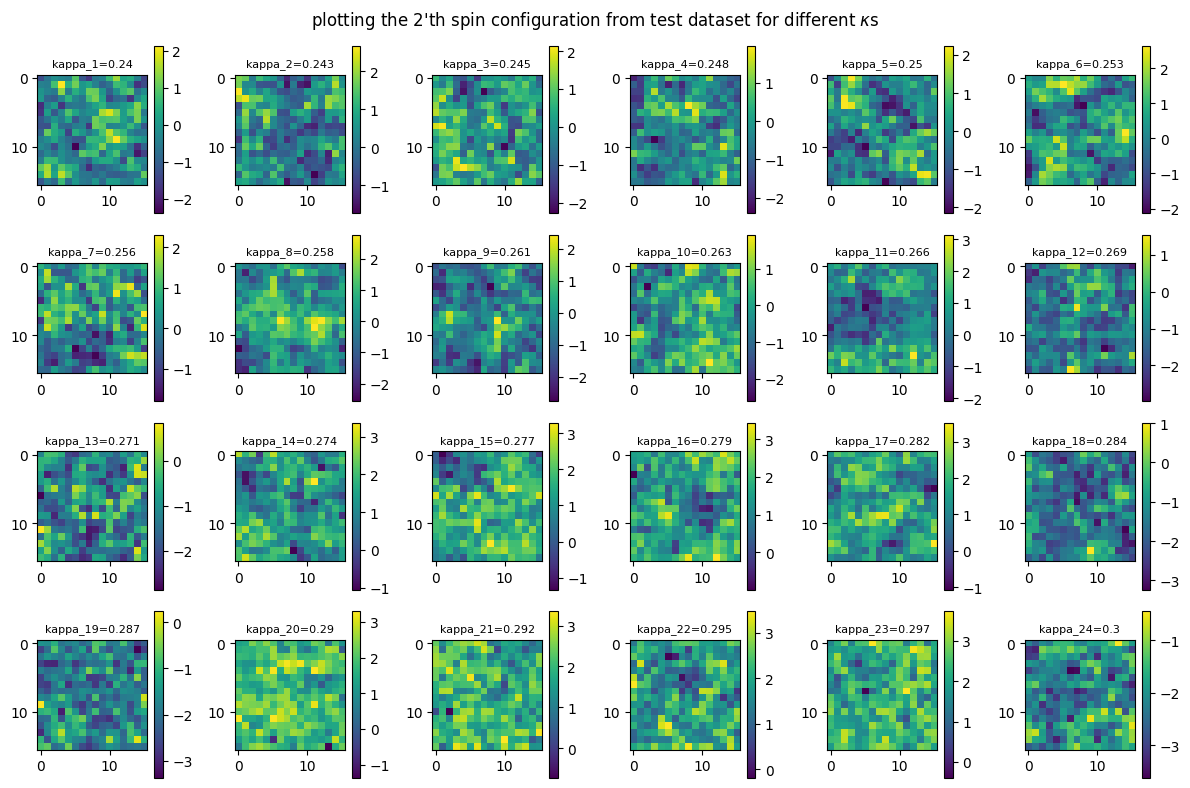

In [39]:
# #### plotting the test data
num_kappas_test = test.shape[0]
delta_kappa = (0.3 - 0.24) / (num_kappas_test-1)
print("delta_kappa:",delta_kappa)


# let's plot first 5 configurations of different kappas.
#for plots in range(0,1):# for the time being, let;s plot only the first configuration for all different kappas
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8))
config_num=1
plt.suptitle(f"plotting the {config_num+1}'th spin configuration from test dataset for different $\kappa$s")
for i in range(0, num_kappas_test):
  data = test[i, config_num, :, :]
  # axes.flatten()[i].imshow(data, cmap='viridis')
  im = axes.flatten()[i].imshow(data, cmap='viridis')
  axes.flatten()[i].set_title(f"kappa_{i + 1}={np.round(0.24+i*delta_kappa,3)}",fontsize=8)  # Set subplot title
  plt.colorbar(im, ax=axes.flatten()[i])

  # Adjust layout to prevent clipping of titles
  plt.tight_layout()

    # Show the plot
plt.show()

(b)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

class CNNModel(nn.Module):
    def __init__(self, nf=16):
        """
        Initialize the CNNModel.

        Parameters:
        - nf (int): Number of filters for the first convolutional layer.
        """
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, nf, kernel_size=5, stride=1, padding=1)
        # Convolutional layer with 1 input channel, nf output channels, 4x4 kernel, and padding to maintain spatial dimensions.

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Max pooling layer with a 2x2 kernel and stride 2 for downsampling.

        # Number of output channels for the second convolutional layer is set to nf for simplicity
        nf_out_conv2 = nf
        self.conv2 = nn.Conv2d(nf, nf_out_conv2, kernel_size=8, stride=1, padding=1)
        # Convolutional layer with nf output channels from conv1, nf_out_conv2 output channels, 4x4 kernel, and padding.


        # Store nf as an instance variable
        self.nf = nf

        ### Fully connected layers
        self.fc1 = nn.Linear(3, 128)# we have later changed the numebr of input params for this layer
        # Fully connected layer with dynamically calculated input features and 128 output features.

        self.fc2 = nn.Linear(128, 128)
        # Additional fully connected layer with 128 input features.

        self.fc3 = nn.Linear(128, 128)
        # Fully connected layer with 64 input features.

        self.fc4 = nn.Linear(128, 1)
        # Fully connected layer with 1 output feature for binary classification.



    def forward(self, x):
      x = F.leaky_relu(self.conv1(x))
      print(f"conv1 output size: {x.size()}")
      print("_"*20)
      print(f"conv1 weight norm: {self.conv1.weight.norm().item()}")
      print(f"conv1 bias norm: {self.conv1.bias.norm().item()}")

      x = self.pool(x)
      print(f"pool output size: {x.size()}")

      x = F.leaky_relu(self.conv2(x))
      print(f"conv2 output size: {x.size()}")
      print(f"conv2 weight norm: {self.conv2.weight.norm().item()}")
      print(f"conv2 bias norm: {self.conv2.bias.norm().item()}")

      height, width = x.size()[2], x.size()[3]
      x = x.view(x.size(0), -1)
      print(f"flattened output size: {x.size()}")

      self.fc1.in_features = self.nf * height * width
      self.fc1 = nn.Linear(self.nf * height * width, 128)

      x = F.leaky_relu(self.fc1(x))
      print(f"fc1 output size: {x.size()}")
      print(f"fc1 weight norm: {self.fc1.weight.norm().item()}")
      print(f"fc1 bias norm: {self.fc1.bias.norm().item()}")

      x = F.leaky_relu(self.fc2(x))
      print(f"fc2 output size: {x.size()}")
      print(f"fc2 weight norm: {self.fc2.weight.norm().item()}")
      print(f"fc2 bias norm: {self.fc2.bias.norm().item()}")

      x = F.leaky_relu(self.fc3(x))
      print(f"fc3 output size: {x.size()}")
      print(f"fc3 weight norm: {self.fc3.weight.norm().item()}")
      print(f"fc3 bias norm: {self.fc3.bias.norm().item()}")

      x = torch.sigmoid(self.fc4(x))
      print(f"fc4 output size: {x.size()}")
      print(f"fc4 weight norm: {self.fc4.weight.norm().item()}")
      print(f"fc4 bias norm: {self.fc4.bias.norm().item()}")

      return x

In [ ]:
import torch.nn.init as init

# class CNNModel2(nn.Module):
#     def __init__(self, nf=8):
#         super(CNNModel2, self).__init__()

#         # Convolutional layers
#         self.conv1 = nn.Conv2d(1, nf, kernel_size=2, stride=1, padding=1)
#         self.bn1 = nn.BatchNorm2d(nf)  # Batch Normalization after conv1
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#         nf_out_conv2 = nf
#         self.conv2 = nn.Conv2d(nf, nf_out_conv2, kernel_size=2, stride=1, padding=1)
#         self.bn2 = nn.BatchNorm2d(nf_out_conv2)  # Batch Normalization after conv2

#         # Add two more convolutional layers
#         self.conv3 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=2, stride=1, padding=1)
#         self.bn3 = nn.BatchNorm2d(nf_out_conv2)  # Batch Normalization after conv3

#         self.conv4 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=2, stride=1, padding=1)
#         self.bn4 = nn.BatchNorm2d(nf_out_conv2)  # Batch Normalization after conv4

#         self.nf = nf

#         # Fully connected layers
#         self.fc1 = nn.Linear(3, 128)
#         self.bn_fc1 = nn.BatchNorm1d(128)  # Batch Normalization after fc1
#         self.fc2 = nn.Linear(128, 1)

#         # Weight Initialization
#         for layer in [self.conv1, self.conv2, self.conv3, self.conv4, self.fc1, self.fc2]:
#             if hasattr(layer, 'weight'):
#                 init.xavier_normal_(layer.weight)

#     def forward(self, x):
#         x = F.leaky_relu(self.bn1(self.conv1(x)))
#         print("_"*20)

#         x = self.pool(x)

#         x = F.leaky_relu(self.bn2(self.conv2(x)))

#         # Add two more convolutional layers
#         x = F.leaky_relu(self.bn3(self.conv3(x)))
#         x = F.leaky_relu(self.bn4(self.conv4(x)))

#         height, width = x.size()[2], x.size()[3]
#         x = x.view(x.size(0), -1)

#         self.fc1.in_features = self.nf * height * width
#         self.fc1 = nn.Linear(self.nf * height * width, 128)
#         x = F.leaky_relu(self.bn_fc1(self.fc1(x)))

#         x = torch.sigmoid(self.fc2(x))

#         return x


############# somewhat of a better performance
# import torch.nn.functional as F
# from torch.nn import init
# import torch.nn as nn

# import torch.nn.functional as F
# from torch.nn import init
# import torch.nn as nn

# class CNNModel2(nn.Module):
#     def __init__(self, nf=8):
#         super(CNNModel2, self).__init__()

#         # Convolutional layers
#         self.conv1 = nn.Conv2d(1, nf, kernel_size=6, stride=1, padding=1)
#         self.bn1 = nn.BatchNorm2d(nf, momentum=0.1)

#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#         nf_out_conv2 = nf
#         self.conv2 = nn.Conv2d(nf, nf_out_conv2, kernel_size=5, stride=1, padding=1)
#         self.bn2 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)

#         # Add two more convolutional layers
#         self.conv3 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=4, stride=1, padding=1)
#         self.bn3 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)

#         self.conv4 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=3, stride=1, padding=1)
#         self.bn4 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)

#         self.nf = nf

#         # Fully connected layers
#         self.fc1 = nn.Linear(3, 64)
#         self.bn_fc1 = nn.BatchNorm1d(64, momentum=0.1)

#         self.fc2 = nn.Linear(64, 1)

#         # Weight Initialization
#         for layer in [self.conv1, self.conv2, self.conv3, self.conv4, self.fc1, self.fc2]:
#             if hasattr(layer, 'weight'):
#                 init.xavier_normal_(layer.weight)

#     def forward(self, x):
#         print(f"Shape before conv1: {x.shape}")

#         x = F.leaky_relu(self.bn1(self.conv1(x)))
#         print(f"Shape after conv1: {x.shape}")

#         x = self.pool(x)

#         x = F.leaky_relu(self.bn2(self.conv2(x)))
#         print(f"Shape after conv2: {x.shape}")

#         # Add two more convolutional layers
#         x = F.leaky_relu(self.bn3(self.conv3(x)))
#         print(f"Shape after conv3: {x.shape}")

#         x = F.leaky_relu(self.bn4(self.conv4(x)))
#         print(f"Shape after conv4: {x.shape}")

#         height, width = x.size()[2], x.size()[3]
#         x = x.view(x.size(0), -1)

#         self.fc1.in_features = self.nf * height * width
#         self.fc1 = nn.Linear(self.nf * height * width, 64)
#         x = F.leaky_relu(self.bn_fc1(self.fc1(x)))
#         print(f"Shape after fc1: {x.shape}")

#         x = torch.sigmoid(self.fc2(x))
#         print(f"Shape after fc2: {x.shape}")

#         return x



In [ ]:
import torch.nn.functional as F
from torch.nn import init
import torch.nn as nn

class CNNModel2(nn.Module):
    def __init__(self, nf=32):
        super(CNNModel2, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, nf, kernel_size=6, stride=1, padding=1)
        init.constant_(self.conv1.bias, 0.01)
        self.bn1 = nn.BatchNorm2d(nf, momentum=0.1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        nf_out_conv2 = 2*nf
        self.conv2 = nn.Conv2d(nf, nf_out_conv2, kernel_size=6, stride=1, padding=1)
        init.constant_(self.conv2.bias, 0.01)
        self.bn2 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # # Add two more convolutional layers
        self.conv3 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=2, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=2, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.nf = nf

        # Fully connected layers
        self.fc1 = nn.Linear(3, 64)
        self.bn_fc1 = nn.BatchNorm1d(64, momentum=0.1)

        self.fc2 = nn.Linear(64,1)

        # Weight Initialization
        for layer in [self.conv1, self.conv2, self.fc1, self.fc2, self.conv3, self.conv4, self.fc1, self.fc2]:
            if hasattr(layer, 'weight'):
                init.xavier_normal_(layer.weight)

    def forward(self, x):
        # print(f"Shape before conv1: {x.shape}")

        x = F.leaky_relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        # print(f"Shape after conv1 and pooling: {x.shape}")

        x = F.leaky_relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        # print(f"Shape after conv2 and pooling: {x.shape}")

        # # Add two more convolutional layers
        x = F.leaky_relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        # print(f"Shape after conv3 and pooling: {x.shape}")

        x = F.leaky_relu(self.bn4(self.conv4(x)))
        x = self.pool4(x)
        # print(f"Shape after conv4 and pooling: {x.shape}")

        height, width = x.size()[2], x.size()[3]
        x = x.view(x.size(0), -1)
        # print("x after flattening::",x.size())

        self.fc1.in_features = 2*self.nf * height * width
        self.fc1 = nn.Linear(2*self.nf * height * width, 64)
        x = F.leaky_relu(self.bn_fc1(self.fc1(x)))
        # print(f"Shape after fc1: {x.shape}")

        x = torch.sigmoid(self.fc2(x))
        # print(f"Shape after fc2: {x.shape}")

        return x


In [ ]:
# import torch.nn.functional as F
# from torch.nn import init
# import torch.nn as nn

# class CNNModel2(nn.Module):
#     def __init__(self, nf=32, dropout_prob=0.05):
#         super(CNNModel2, self).__init__()

#         # Convolutional layers
#         self.conv1 = nn.Conv2d(1, nf, kernel_size=5, stride=1, padding=1)
#         init.constant_(self.conv1.bias, 0.01)
#         self.bn1 = nn.BatchNorm2d(nf, momentum=0.1)
#         self.dropout1 = nn.Dropout2d(dropout_prob)
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

#         nf_out_conv2 = 2 * nf
#         self.conv2 = nn.Conv2d(nf, nf_out_conv2, kernel_size=5, stride=1, padding=1)
#         init.constant_(self.conv2.bias, 0.01)
#         self.bn2 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)
#         self.dropout2 = nn.Dropout2d(dropout_prob)
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Add two more convolutional layers
#         self.conv3 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=2, stride=1, padding=1)
#         self.bn3 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)
#         self.dropout3 = nn.Dropout2d(dropout_prob)
#         self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.conv4 = nn.Conv2d(nf_out_conv2, nf_out_conv2, kernel_size=2, stride=1, padding=1)
#         self.bn4 = nn.BatchNorm2d(nf_out_conv2, momentum=0.1)
#         self.dropout4 = nn.Dropout2d(dropout_prob)
#         self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.nf = nf

#         # Fully connected layers
#         self.fc1 = nn.Linear(2 * nf * 3 * 3, 64)
#         self.bn_fc1 = nn.BatchNorm1d(64, momentum=0.1)
#         self.dropout_fc1 = nn.Dropout(dropout_prob)

#         self.fc2 = nn.Linear(64, 1)

#         # Weight Initialization
#         for layer in [self.conv1, self.conv2, self.fc1, self.fc2, self.conv3, self.conv4, self.fc1, self.fc2]:
#             if hasattr(layer, 'weight'):
#                 init.xavier_normal_(layer.weight)

#     def forward(self, x):
#         # print(f"Shape before conv1: {x.shape}")

#         x = F.leaky_relu(self.bn1(self.conv1(x)))
#         x = self.dropout1(x)
#         x = self.pool1(x)
#         # print(f"Shape after conv1, dropout1, and pooling: {x.shape}")

#         x = F.leaky_relu(self.bn2(self.conv2(x)))
#         x = self.dropout2(x)
#         x = self.pool2(x)
#         # print(f"Shape after conv2, dropout2, and pooling: {x.shape}")

#         # Add two more convolutional layers
#         x = F.leaky_relu(self.bn3(self.conv3(x)))
#         x = self.dropout3(x)
#         x = self.pool3(x)
#         # print(f"Shape after conv3, dropout3, and pooling: {x.shape}")

#         x = F.leaky_relu(self.bn4(self.conv4(x)))
#         x = self.dropout4(x)
#         x = self.pool4(x)
#         # print(f"Shape after conv4, dropout4, and pooling: {x.shape}")

#         height, width = x.size()[2], x.size()[3]
#         x = x.view(x.size(0), -1)
#         # print("x after flattening::",x.size())

#         self.fc1.in_features = 2 * self.nf * height * width
#         self.fc1 = nn.Linear(2 * self.nf * height * width, 64)
#         x = F.leaky_relu(self.bn_fc1(self.fc1(x)))
#         x = self.dropout_fc1(x)
#         # print(f"Shape after fc1, dropout_fc1: {x.shape}")

#         x = torch.sigmoid(self.fc2(x))
#         # print(f"Shape after fc2: {x.shape}")

#         return x


In [ ]:
# # Instantiate the model
# model = CNNModel()

# # Print the architecture
# print(model)

# # Print the number of parameters
# total_params = sum(p.numel() for p in model.parameters())
# print(f"Number of parameters in the model: {total_params}")

(c)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import torch.nn.utils as torch_utils

In [ ]:
# def train_model(model, train_loader, criterion, optimizer, epochs, print_num=10):
#     losses = []

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0

#         for inputs, labels in train_loader:
#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(inputs.float())

#             # Assuming binary classification, convert labels to float
#             labels = labels.float().view(-1, 1)

#             # Compute the loss
#             loss = criterion(outputs, labels)

#             # Backward pass and optimization step
#             loss.backward()
#             # Print gradients for inspection
#             print("----in train model function after backward pass gradients of the params:----")
#             for name, param in model.named_parameters():
#                 print(f'{name}: {param.grad.norm().item()}')

#             # Clip gradients
#             torch_utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#             optimizer.step()

#             running_loss += loss.item()
#             #print("running loss is:",running_loss)

#         average_loss = running_loss / len(train_loader)
#         losses.append(average_loss)

#         if (epoch + 1) % print_num == 0:
#             print(f"Epoch {epoch+1}/{epochs}, Loss: {average_loss}")

#     print("Training finished.")
#     return losses


#### trainning with scheduler related code included
import torch.optim as optim
from torch.optim import lr_scheduler

def train_model(model, train_loader, criterion, optimizer, scheduler, epochs, print_num=10):
    losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs.float())

            # Assuming binary classification, convert labels to float
            labels = labels.float().view(-1, 1)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization step
            loss.backward()
            # Print gradients for inspection
            # print("----in train model function after backward pass gradients of the params:----")
            # for name, param in model.named_parameters():
            #     print(f'{name}: {param.grad.norm().item()}')

            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            running_loss += loss.item()
            #print("running loss is:", running_loss)

        average_loss = running_loss / len(train_loader)
        losses.append(average_loss)

        if scheduler is not None:
            # Step in the scheduler to update the learning rate
            scheduler.step()

        if (epoch + 1) % print_num == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {average_loss}")

    print("Training finished.")
    return losses



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# # preparing the training dataloader
# import torch
# from torch.utils.data import TensorDataset, DataLoader

# # Assuming train is your training tensor with shape [2, 1000, 16, 16]
# # and each set of lattice sites for a κ value is along the first dimension

# # Reshape the training tensor
# train_data = train.permute(1, 0, 2, 3).reshape(-1, 16, 16)
# print("train_data.shape is:", train_data.shape)

# # Generate dummy labels for the dataset
# #train_labels = # Generate dummy labels for the dataset
# train_labels = torch.cat([torch.zeros(1000, 1), torch.ones(1000, 1)])
# #torch.cat([torch.zeros(1000), torch.ones(1000)])

# # Add channel dimension
# train_data = train_data.unsqueeze(1)
# print("train_data.shape after adding a channel dimension")
# print(train_data.shape)

# # Convert NumPy arrays back to PyTorch tensors
# train_data, train_labels = map(torch.tensor, (train_data.numpy(), train_labels.numpy()))
# print("train_data.shape now is:")
# print(train_data.shape)

# # Create DataLoader for the training set
# batch_size = 64
# train_dataset = TensorDataset(train_data, train_labels)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


import torch
from torch.utils.data import TensorDataset, DataLoader

# Assuming train is your training tensor with shape [2, 1000, 16, 16]
# and each set of lattice sites for a κ value is along the first dimension

# Reshape the training tensor
train_data = train.permute(1, 0, 2, 3).reshape(-1, 16, 16)
print("train_data.shape is:", train_data.shape)

# Calculate mean and standard deviation for each 16x16 part
mean_per_part = train_data.mean(dim=(1, 2))
std_per_part = train_data.std(dim=(1, 2))

# Normalize each 16x16 part
train_data_normalized = (train_data - mean_per_part[:, None, None]) / std_per_part[:, None, None]

# Generate dummy labels for the dataset
train_labels = torch.cat([torch.zeros(1000, 1), torch.ones(1000, 1)])

# Add channel dimension
train_data_normalized = train_data_normalized.unsqueeze(1)
print("train_data_normalized.shape after adding a channel dimension")
print(train_data_normalized.shape)

# Convert NumPy arrays back to PyTorch tensors
train_data_normalized, train_labels = map(torch.tensor, (train_data_normalized.numpy(), train_labels.numpy()))
print("train_data_normalized.shape now is:")
print(train_data_normalized.shape)

# Create DataLoader for the training set
batch_size = 32
train_dataset = TensorDataset(train_data_normalized, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


train_data.shape is: torch.Size([2000, 16, 16])
train_data_normalized.shape after adding a channel dimension
torch.Size([2000, 1, 16, 16])
train_data_normalized.shape now is:
torch.Size([2000, 1, 16, 16])


In [ ]:
model = CNNModel2()
print(model)

CNNModel2(
  (conv1): Conv2d(1, 32, kernel_size=(6, 6), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(6, 6), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1,

Epoch 10/100, Loss: 0.6942015025350783
Epoch 20/100, Loss: 0.5099911216705565
Epoch 30/100, Loss: 0.373770605004023
Epoch 40/100, Loss: 0.3538461734378149
Epoch 50/100, Loss: 0.35731029841634965
Epoch 60/100, Loss: 0.35360327173793127
Epoch 70/100, Loss: 0.3521725923296005
Epoch 80/100, Loss: 0.35541292410048225
Epoch 90/100, Loss: 0.35402745103079175
Epoch 100/100, Loss: 0.3637743753100198
Training finished.


Text(0.5, 0, 'epoch')

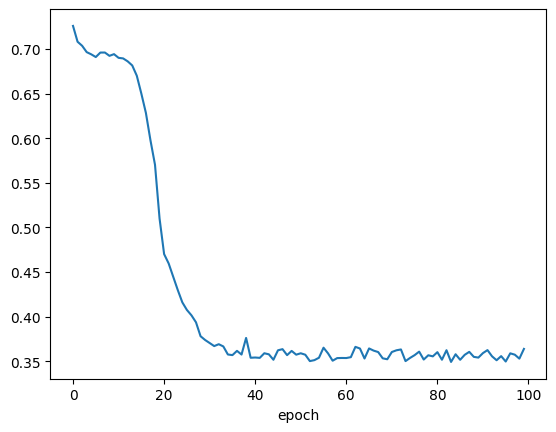

In [ ]:
# # # Instantiate the model
# model = CNNModel2()

# # Define BCE loss and optimizer
# criterion = nn.BCELoss()
# optimizer = optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# # Number of training epochs
# epochs = 50

# # Call the training function
# average_loss = train_model(model, train_loader, criterion, optimizer, epochs, print_num=2)
# print(f"Average Training Loss: {average_loss}")
# # plt.yscale('log')
# plt.plot(average_loss)
# plt.xlabel("epoch")

#####

# Create the model, optimizer, and scheduler
model = CNNModel2()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.02,weight_decay=0.001)

# Define RMSprop optimizer
# Define RMSprop optimizer
learning_rate=0.001

### best performance so far
optimizer = optim.Adam(model.parameters(), lr=0.0185, weight_decay=2*1e-4)#0.018 #0.0152# worked best so far, 0.013
### best one so far: 0.018



# optimizer=optim.RMSprop(model.parameters(), lr=0.0185, alpha=0.9)

# ## optimizer= optim.RMSprop(model.parameters(), lr=0.015, alpha=0.9)
#torch.optim.Adadelta(model.parameters(), lr=learning_rate)#optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
#optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
#optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)# gamma 0.1

# # Define BCE loss
criterion = nn.BCELoss()
epochs=100

# Train the model with the scheduler
average_losses = train_model(model, train_loader, criterion, optimizer, scheduler, epochs=epochs, print_num=10)
#print(f"Average Training Loss: {average_loss}")
# plt.yscale('log')
plt.plot(average_losses)
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

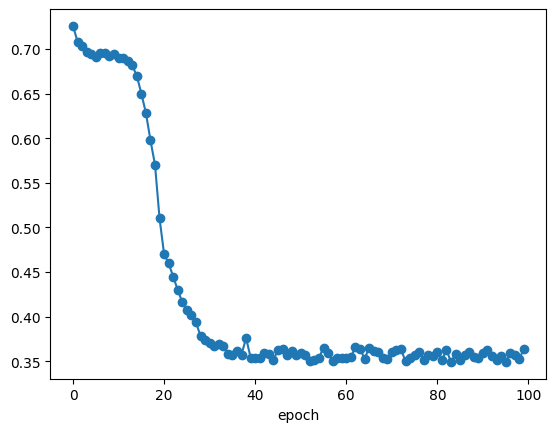

In [ ]:
plt.plot(average_losses,"o-")
plt.xlabel("epoch")

In [ ]:
# TODO: Train CNN

(d)

In [ ]:
# TODO: Evaluate CNN

In [ ]:
# TODO: Plot means and stds

# 3) Uncertainties in Amplitude Regression

In [4]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=0184c5e80f2bc556ae20c1809e6577f61df326afe8e0a80c779578684a15a874
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [5]:
# download data to folder data04
# this might take some time (50MB)
# you can also do this manually (download + unpack zip)
import os, sys
import wget
from zipfile import ZipFile
from tqdm import tqdm

DESTINATION = "data04"
url = "https://www.thphys.uni-heidelberg.de/~plehn/pics/"
filename = "tutorial-2-data.zip"
url = url + filename

os.makedirs(DESTINATION, exist_ok=True)
os.chdir(DESTINATION)
wget.download(url, filename)
with ZipFile(filename, "r") as zip_ref:
    for file in tqdm(iterable=zip_ref.namelist(), total=len(zip_ref.namelist())):
        zip_ref.extract(member=file)
%ls
os.chdir("..")

100%|██████████| 11/11 [00:00<00:00, 26.76it/s]

tutorial-2-data/  tutorial-2-data.zip


In [6]:
# load data
#/content/data04/tutorial-2-data/test_amp.npy
trn_dat = np.load("/content/data04/tutorial-2-data/trn_dat.npy")
trn_amp = np.load("/content/data04/tutorial-2-data/trn_amp.npy")

val_dat = np.load("/content/data04/tutorial-2-data/val_dat.npy")
val_amp = np.load("/content/data04/tutorial-2-data/val_amp.npy")

tst_dat = np.load("/content/data04/tutorial-2-data/tst_dat.npy")
tst_amp = np.load("/content/data04/tutorial-2-data/tst_amp.npy")

print(f"train data shape: {trn_dat.shape}")
print(f"train amp  shape: {trn_amp.shape}")
print(f"test  data shape: {tst_dat.shape}")
print(f"test  amp  shape: {tst_amp.shape}")
print(f"val   data shape: {val_dat.shape}")
print(f"val   amp  shape: {val_amp.shape}")

train data shape: (30000, 5, 4)
train amp  shape: (30000,)
test  data shape: (30000, 5, 4)
test  amp  shape: (30000,)
val   data shape: (30000, 5, 4)
val   amp  shape: (30000,)


(a)

In [7]:
# TODO: Recycle code from last sheet

# Flatten the dataset
nev = trn_dat.shape[0]
trn_datf = np.reshape(trn_dat, (nev, -1))
val_datf = np.reshape(val_dat, (nev, -1))
tst_datf = np.reshape(tst_dat, (nev, -1))

In [8]:
### define some functions to preprocess and undo_preprocessing
def preprocess_x(x_in, mean=None, std=None):
    x = x_in.copy() # do not overwrite
    if mean is None or std is None:
        mean = x.mean(keepdims=True)
        std = x.std(keepdims=True)
    x = (x - mean) / std # standardize
    assert np.isfinite(x).all() # check for nans and infs
    return torch.Tensor(x).float(), mean, std # create torch tensors

def preprocess_A(A_in, mean=None, std=None):
    A = A_in.copy()
    A = np.log(A)
    if mean is None or std is None:
        mean = A.mean(keepdims=True)
        std = A.std(keepdims=True)
    A = (A - mean) / std
    assert np.isfinite(A).all()
    return torch.tensor(A).float().unsqueeze(-1), mean, std

def undo_preprocess_A(A_in, mean, std):
    A = A_in.copy()
    A = A * std + mean
    A = np.exp(A)
    return A

In [9]:
### define the class amp_dataset
class amp_dataset(torch.utils.data.Dataset):

    def __init__(self, data, amp):
        self.data = data
        self.amp = amp

    def __len__(self):
        return len(self.amp)

    def __getitem__(self, idx):
        return self.data[idx], self.amp[idx]

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [11]:
### deine the amplitude regression model:
class amp_net(nn.Module):

    def __init__(self, hdn_dim=32, ipt_dim=20, opt_dim=1, n_layers=2):
        super(amp_net, self).__init__()

        assert n_layers>=2

        layers = []
        layers.append(nn.Linear(ipt_dim, hdn_dim))
        layers.append(nn.ReLU())
        for _ in range(n_layers-2):
            layers.append(nn.Linear(hdn_dim, hdn_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hdn_dim, opt_dim))

        self.linear_relu_stack = nn.Sequential(*layers)

    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out

In [12]:
### define model training
def batch_loss(model, x, y, loss_fn=nn.MSELoss()):
    x, y = x.to(device), y.to(device)
    pred = model(x)
    loss = loss_fn(pred, y)
    return loss

def train_epoch(model, dataloader, losses, batch_loss_fn,optimizer):
    for x, y in dataloader:
        optimizer.zero_grad()

        loss = batch_loss_fn(model, x, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

def val_epoch(model, dataloader, losses, batch_loss_fn,optimizer):
    losses_epoch = []
    with torch.no_grad():
        for x, y in dataloader:
            loss = batch_loss_fn(model, x,y)
            losses_epoch.append(loss.item())
    losses.append(np.mean(losses_epoch))
    return losses

In [13]:
def train_model(model, trn_dataloader, val_dataloader, optimizer, num_epochs=100, device="cuda",print_after=10):
    model.to(device)
    loss_fn = nn.MSELoss()
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_losses = train_epoch(model, trn_dataloader, train_losses, batch_loss, optimizer)

        # Validation
        model.eval()
        val_losses = val_epoch(model, val_dataloader, val_losses, batch_loss, optimizer)

        if (epoch+1)%print_after ==0:
          print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}")

    return train_losses, val_losses



In [14]:
### create the dataset and dataloaders
trn_datfp, mean_x, std_x = preprocess_x(trn_datf)
val_datfp, _, _ = preprocess_x(val_datf, mean_x, std_x)
tst_datfp, _, _ = preprocess_x(tst_datf, mean_x, std_x)

trn_ampp, mean_A, std_A = preprocess_A(trn_amp)
val_ampp, _, _ = preprocess_A(val_amp, mean_A, std_A)
tst_ampp, _, _ = preprocess_A(tst_amp, mean_A, std_A)

trn_dataset = amp_dataset(trn_datfp, trn_ampp)
val_dataset = amp_dataset(val_datfp, val_ampp)
tst_dataset = amp_dataset(tst_datfp, tst_ampp)

batch_size = 64
trn_dataloader = torch.utils.data.DataLoader(trn_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
tst_dataloader = torch.utils.data.DataLoader(tst_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Example Usage
model = amp_net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses = train_model(model, trn_dataloader, val_dataloader, optimizer, num_epochs=100, device=device,print_after=5)

Epoch 5/100, Train Loss: 0.058524709194898605, Val Loss: 0.12289923141950737
Epoch 10/100, Train Loss: 0.10285818576812744, Val Loss: 0.0792917366872337
Epoch 15/100, Train Loss: 0.05719846859574318, Val Loss: 0.06329102483369521
Epoch 20/100, Train Loss: 0.06507005542516708, Val Loss: 0.055735550074180816
Epoch 25/100, Train Loss: 0.02496938966214657, Val Loss: 0.050173352744533564
Epoch 30/100, Train Loss: 0.04038932919502258, Val Loss: 0.04226894821050261
Epoch 35/100, Train Loss: 0.045793309807777405, Val Loss: 0.03952306018733203
Epoch 40/100, Train Loss: 0.11872503161430359, Val Loss: 0.038107388978526155
Epoch 45/100, Train Loss: 0.028013544157147408, Val Loss: 0.03465680597520777
Epoch 50/100, Train Loss: 0.03205685317516327, Val Loss: 0.03205346293064323
Epoch 55/100, Train Loss: 0.027409911155700684, Val Loss: 0.03152311924916468
Epoch 60/100, Train Loss: 0.01738843508064747, Val Loss: 0.032858706059565805
Epoch 65/100, Train Loss: 0.023190932348370552, Val Loss: 0.0298299600

In [ ]:
def evaluate(model, train_losses, len_trn_dataloader, val_losses,tst_amp):
    # plot loss
    plt.yscale("log")
    plt.plot(np.arange(len(train_losses)) / len_trn_dataloader, train_losses)
    plt.plot(np.arange(len(val_losses)), val_losses)
    plt.show()

    # calculate predictions
    predsp = np.array([])
    with torch.no_grad():
        for x, y in tst_dataloader:
            pred = model(x)
            predsp = np.append(predsp, pred)

    # undo preprocessing
    preds = undo_preprocess_A(predsp, mean_A, std_A)

    #plt.yscale("log")
    plt.hist(np.log(preds), alpha=.5, range=(-20, -8), bins=50,label="predictions")
    plt.hist(np.log(tst_amp), alpha=.5, range=(-20, -8), bins=50,label="actual")
    plt.xlabel(r"$\log A$")
    plt.show()
    return preds # returning the predictions

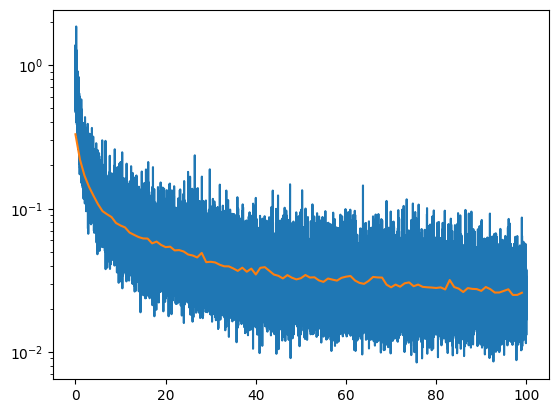

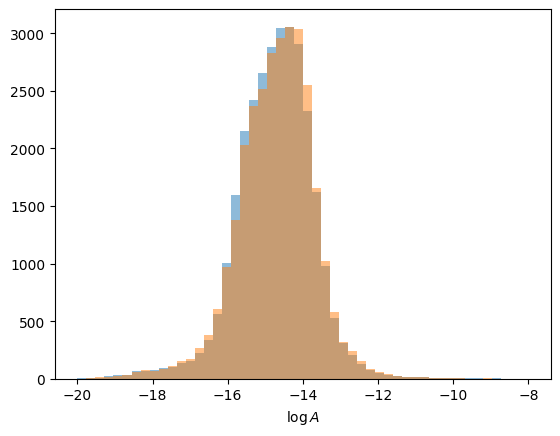

In [ ]:
preds=evaluate(model,train_losses,len(trn_dataloader),val_losses,tst_amp)

In [ ]:
type(preds),preds.shape

(numpy.ndarray, (30000,))

In [ ]:
# TODO: Train ensemble of deterministic networks

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Assuming you have already defined your amp_net and training functions

# Function to train an ensemble of models
def train_ensemble(num_models, trn_dataloader, val_dataloader, num_epochs=100, device="cuda", print_after=25):
    ensemble_models = []

    for i in range(num_models):
        print(f"Training model {i + 1}...")

        # Create a new instance of the model for each iteration
        model = amp_net()
        model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        train_losses, _ = train_model(model, trn_dataloader, val_dataloader, optimizer, num_epochs=num_epochs, device=device, print_after=print_after)

        # Append the trained model to the ensemble
        ensemble_models.append(model)

    return ensemble_models

#
num_models = 10
ensemble_models = train_ensemble(num_models, trn_dataloader, val_dataloader, num_epochs=100, device=device, print_after=25)

# Evaluate each model in the ensemble on the test set
ensemble_predictions = []
for model in ensemble_models:
    model.eval()
    model_predictions = []

    with torch.no_grad():
        for x, _ in tst_dataloader:
            preds = model(x)

            # Undo preprocessing before appending to model_predictions
            preds = undo_preprocess_A(preds.cpu().numpy(), mean_A, std_A)

            model_predictions.extend(preds)

    ensemble_predictions.append(model_predictions)

# Calculate mean and standard deviation over the ensemble predictions
ensemble_predictions = np.array(ensemble_predictions)
mean_predictions = np.mean(ensemble_predictions, axis=0)
std_predictions = np.std(ensemble_predictions, axis=0)



Training model 1...
Epoch 25/100, Train Loss: 0.059981267899274826, Val Loss: 0.046274057410752724
Epoch 50/100, Train Loss: 0.028025329113006592, Val Loss: 0.03209752818819747
Epoch 75/100, Train Loss: 0.015846580266952515, Val Loss: 0.029366809350531747
Epoch 100/100, Train Loss: 0.029833689332008362, Val Loss: 0.029758769510460813
Training model 2...
Epoch 25/100, Train Loss: 0.032081734389066696, Val Loss: 0.04801781043044921
Epoch 50/100, Train Loss: 0.036324642598629, Val Loss: 0.03320461576744946
Epoch 75/100, Train Loss: 0.017556047067046165, Val Loss: 0.0307984952447511
Epoch 100/100, Train Loss: 0.017992477864027023, Val Loss: 0.02903802149982722
Training model 3...
Epoch 25/100, Train Loss: 0.05771348252892494, Val Loss: 0.047314139122743085
Epoch 50/100, Train Loss: 0.016609424725174904, Val Loss: 0.040164674511119755
Epoch 75/100, Train Loss: 0.05552638694643974, Val Loss: 0.030578101022061762
Epoch 100/100, Train Loss: 0.026892101392149925, Val Loss: 0.02817179638344342
T

In [ ]:
# TODO: Evaluate ensemble -> List of predictions for log A
# result: array preds of shape (10, 30000)

In [ ]:
ensemble_predictions.shape

(10, 30000)

In [ ]:
ensemble_predictions = ensemble_predictions.squeeze(axis=-1)

In [ ]:
preds=ensemble_predictions.copy()

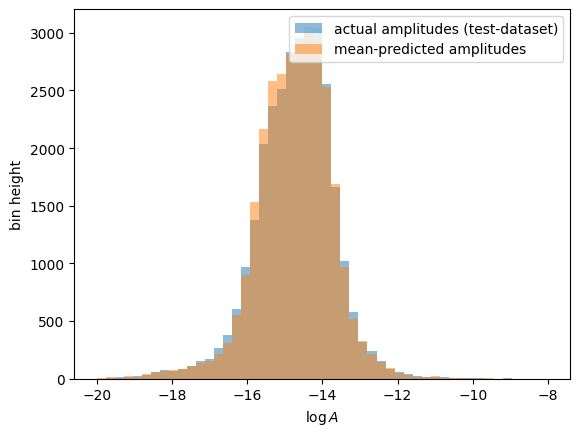

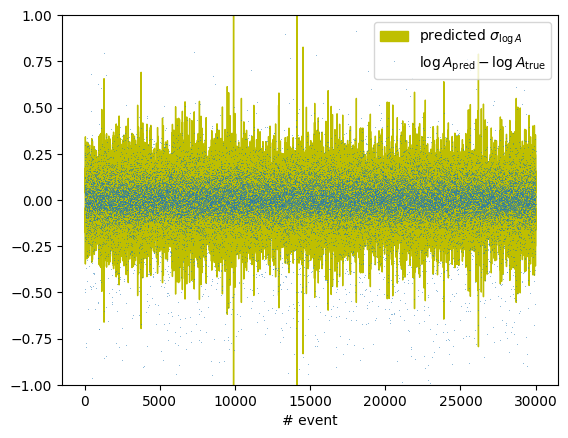

In [ ]:
# uncertainties at event level

preds_means = np.mean(np.log(preds), axis=0)
preds_stds = np.std(np.log(preds), axis=0)

plt.hist(np.log(tst_amp), range=(-20, -8), bins=50, alpha=.5,label="actual amplitudes (test-dataset)")
plt.hist(preds_means, range=(-20, -8), bins=50, alpha=.5, label="mean-predicted amplitudes")
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.legend()
plt.show()

x = range(len(tst_amp))
plt.fill_between(x, preds_stds, -preds_stds, color="y", label=r"predicted $\sigma_{\log A}$")
plt.plot(x, preds_means - np.log(tst_amp), ",", alpha=.5, ms=.1, label=r"$\log A_\mathrm{pred}-\log A_\mathrm{true}$")
plt.xlabel("# event")
plt.ylim(-1,1)
plt.legend()
plt.show()

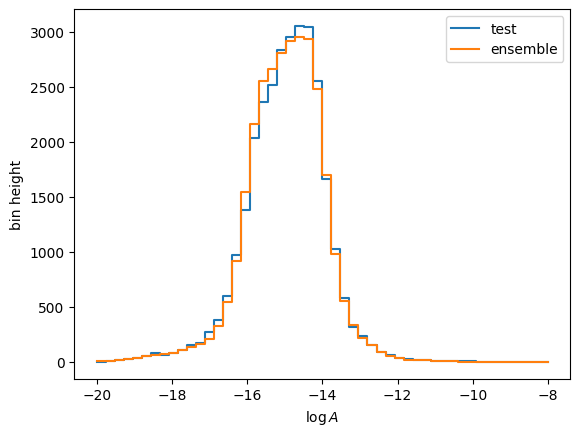

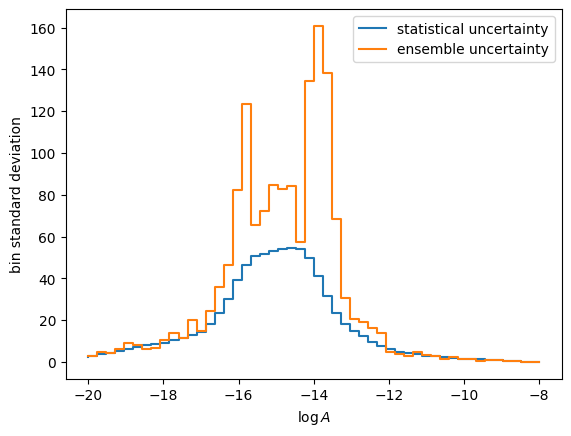

<ipython-input-68-848fc65279b4>:39: RuntimeWarning: invalid value encountered in divide
  ratio = (y * scale) / (hists[0] * scales[0])
<ipython-input-68-848fc65279b4>:40: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt( (y_err/y)**2 + (hist_errors[0] / hists[0])**2)
<ipython-input-68-848fc65279b4>:39: RuntimeWarning: divide by zero encountered in divide
  ratio = (y * scale) / (hists[0] * scales[0])


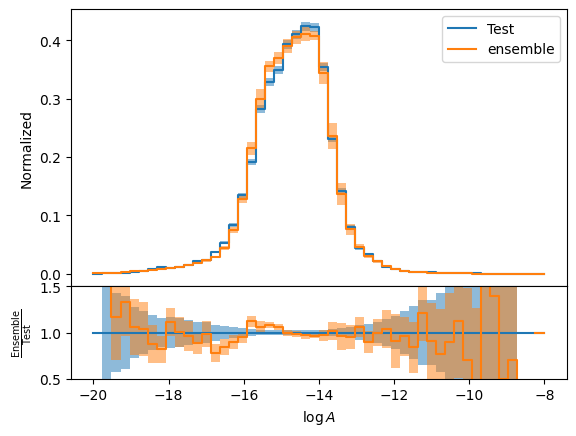

In [ ]:
# uncertainties at histogram level
n_models=num_models

hist_test, bins = np.histogram(np.log(tst_amp), range=(-20,-8), bins=50)
hist_data = np.array([np.histogram(np.log(preds[i,:]), bins=bins)[0] for i in range(n_models)])
hist_means = np.mean(hist_data, axis=0)
hist_stds = np.std(hist_data, axis=0)

# means
dup_last = lambda a: np.append(a, a[-1])
plt.step(bins, dup_last(hist_test), label="test")
plt.step(bins, dup_last(hist_means), label="ensemble")
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.legend()
plt.show()

# standard deviations
plt.step(bins, dup_last(np.sqrt(hist_means)), label="statistical uncertainty")
plt.step(bins, dup_last(hist_stds), label="ensemble uncertainty")
plt.xlabel(r"$\log A$")
plt.ylabel("bin standard deviation")
plt.legend()
plt.show()

# means + standard deviations
hists = [hist_test, hist_means]
hist_errors = [np.sqrt(hist_test), hist_stds]
integrals = [np.sum((bins[1:] - bins[:-1])*y) for y in hists]
scales = [1 / integral if integral != 0. else 1. for integral in integrals]

label = ["Test", "ensemble"]
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": [3, 1], "hspace": 0.})
for y, y_err, scale, label in zip(hists, hist_errors, scales, label):
    axs[0].step(bins, dup_last(y) * scale, label=label, where="post")
    axs[0].fill_between(bins, dup_last(y + y_err) * scale,
                     dup_last(y - y_err) * scale, alpha=.5, step="post")

    ratio = (y * scale) / (hists[0] * scales[0])
    ratio_err = np.sqrt( (y_err/y)**2 + (hist_errors[0] / hists[0])**2)
    ratio[np.isnan(ratio)] = 1.
    ratio_err[np.isnan(ratio)] = 0.

    axs[1].step(bins, dup_last(ratio), where="post")
    axs[1].fill_between(bins, dup_last(ratio + ratio_err), dup_last(ratio - ratio_err), step="post", alpha=.5)
axs[1].set_xlabel(r"$\log A$")
axs[0].set_ylabel("Normalized")
axs[1].set_ylabel(r"$\frac{\mathrm{Ensemble}}{\mathrm{Test}}$")
axs[1].set_ylim(.5, 1.5)
axs[0].legend()
plt.show()

# TODO: Interpret results

(d)

### BNN

In [34]:
# TODO: Fill in expression for KL divergence
import math

class VBLinear(nn.Module):
    # VB = variational bayes
    def __init__(self, in_features, out_features, prior_prec=1.0, _map=False, std_init=-5):
        super(VBLinear, self).__init__()
        self.n_in = in_features
        self.n_out = out_features
        self.map = _map
        self.prior_prec = prior_prec # = 1/sigma_prior**2
        self.random = None
        self.bias = nn.Parameter(torch.Tensor(out_features))
        self.mu_w = nn.Parameter(torch.Tensor(out_features, in_features))
        self.logsig2_w = nn.Parameter(torch.Tensor(out_features, in_features)) # log(sigma_network**2)
        self.std_init = std_init
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.mu_w.size(1))
        self.mu_w.data.normal_(0, stdv)
        self.logsig2_w.data.zero_().normal_(self.std_init, 0.001)
        self.bias.data.zero_()

    def KL(self):
        logsig2_w = self.logsig2_w.clamp(-11, 11)
        kl = 0.5 * ( self.prior_prec* (logsig2_w.exp() + self.mu_w.pow(2)) - 1 - logsig2_w + np.log(self.prior_prec)).sum()
        return kl

    def forward(self, input):
        if self.training:
            # local reparameterization trick is more efficient and leads to
            # an estimate of the gradient with smaller variance.
            # https://arxiv.org/pdf/1506.02557.pdf
            mu_out = nn.functional.linear(input, self.mu_w, self.bias)### deterministic output of sort
            logsig2_w = self.logsig2_w.clamp(-11, 11)
            s2_w = logsig2_w.exp()
            var_out = nn.functional.linear(input.pow(2), s2_w) + 1e-8### way to estimate the variance of the output
            return mu_out + var_out.sqrt() * torch.randn_like(mu_out)### stochastic output # this is our stochastic parameter of the layer

        else:
            if self.map: # just return the mean, no sampling
                return nn.functional.linear(input, self.mu_w, self.bias)

            logsig2_w = self.logsig2_w.clamp(-11, 11)
            if self.random is None:
                self.random = torch.randn_like(self.logsig2_w)
            s2_w = logsig2_w.exp()
            weight = self.mu_w + s2_w.sqrt() * self.random
            return nn.functional.linear(input, weight, self.bias) + 1e-8

In [19]:
# TODO: Create BNN (like deterministic network, but with bayesian layers)

class bayesian_amp_net(nn.Module):

    def __init__(self, training_size, ipt_dim=20, opt_dim=1, hdn_dim=32, n_layers=2):
        super(bayesian_amp_net, self).__init__()

        layers = []

        # Input layer
        layers.append(VBLinear(ipt_dim, hdn_dim))

        # Hidden layers
        for _ in range(n_layers - 2):
            layers.append(VBLinear(hdn_dim, hdn_dim))

        # Output layer
        layers.append(VBLinear(hdn_dim, opt_dim))

        self.bayesian_layers = nn.Sequential(*layers)


    def forward(self, x):
        return self.bayesian_layers(x)

    def KL(self):
        kl = 0
        for layer in self.bayesian_layers:
            kl += layer.KL()
        return kl

    def reset_BNN(self):
        for layer in self.bayesian_layers:
            layer.random = None

In [17]:
def batch_loss_bayesian(model, x, y,loss_fn=nn.MSELoss()):
    x, y = x.to(device), y.to(device)
    pred = model(x)
    loss = loss_fn(pred, y)
    kl = model.KL() / trn_dat.shape[0] # correct normalization!
    loss += kl
    return loss

In [18]:
# TODO: Train BNN

import torch.optim as optim

def train_epoch_bayesian(model, dataloader, losses, batch_loss_fn, optimizer):
    model.train()
    for x, y in dataloader:
        optimizer.zero_grad()

        loss = batch_loss_fn(model, x, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

def val_epoch_bayesian(model, dataloader, losses, batch_loss_fn, optimizer):
    model.eval()
    losses_epoch = []
    with torch.no_grad():
        for x, y in dataloader:
            loss = batch_loss_fn(model, x, y)
            losses_epoch.append(loss.item())
    losses.append(np.mean(losses_epoch))
    return losses



In [27]:
import torch.optim as optim

def train_model_bayesian(model, trn_dataloader, val_dataloader, num_epochs=100, device="cuda", print_after=10):
    #model.to(device)

    # Define optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_losses = train_epoch_bayesian(model, trn_dataloader, train_losses, batch_loss_bayesian, optimizer)

        # Validation
        model.eval()
        val_losses = val_epoch_bayesian(model, val_dataloader, val_losses, batch_loss_bayesian, optimizer)

        if (epoch + 1) % print_after == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}")

    return train_losses, val_losses


In [23]:
training_size = len(trn_dataset)
print("Training size:", training_size)

Training size: 30000


Epoch 10/200, Train Loss: 1.0403996706008911, Val Loss: 0.6438794127151147
Epoch 20/200, Train Loss: 0.5976868867874146, Val Loss: 0.6563014958077656
Epoch 30/200, Train Loss: 0.6477252244949341, Val Loss: 0.6294636510963887
Epoch 40/200, Train Loss: 0.5251832008361816, Val Loss: 0.6180313445611804
Epoch 50/200, Train Loss: 0.6014245748519897, Val Loss: 0.6160119896504417
Epoch 60/200, Train Loss: 0.4711266756057739, Val Loss: 0.6173009177896259
Epoch 70/200, Train Loss: 0.3685883581638336, Val Loss: 0.6008472817538898
Epoch 80/200, Train Loss: 0.6730222702026367, Val Loss: 0.6012909397133378
Epoch 90/200, Train Loss: 0.687050998210907, Val Loss: 0.5996956182187045
Epoch 100/200, Train Loss: 0.49638834595680237, Val Loss: 0.5990642924298609
Epoch 110/200, Train Loss: 0.49135109782218933, Val Loss: 0.5987728797296471
Epoch 120/200, Train Loss: 0.741960883140564, Val Loss: 0.5965924121296482
Epoch 130/200, Train Loss: 0.5342110395431519, Val Loss: 0.5963781130339291
Epoch 140/200, Train 

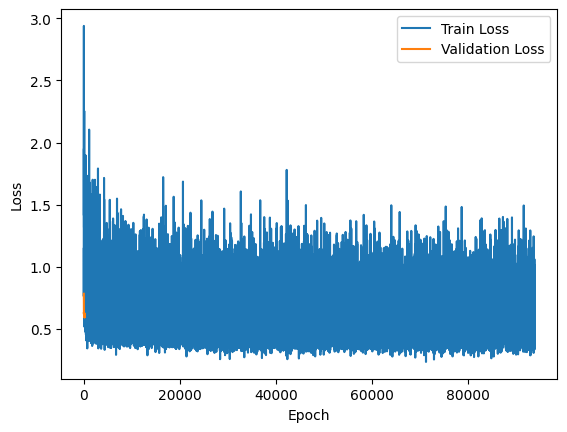

In [36]:
## instantiate the model
bnn_model=bayesian_amp_net(training_size)

num_epochs = 200

# Train the Bayesian Neural Network
train_losses, val_losses = train_model_bayesian(bnn_model, trn_dataloader, val_dataloader, num_epochs=num_epochs)

# Optionally, plot the training and validation losses over epochs
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

(e)

In [ ]:
# TODO: Evaluate BNN

In [ ]:
# uncertainties at event level

preds_means = np.mean(np.log(preds), axis=0)
preds_stds = np.std(np.log(preds), axis=0)

plt.hist(np.log(tst_amp), range=(-20, -8), bins=50, alpha=.5)
plt.hist(preds_means, range=(-20, -8), bins=50, alpha=.5)
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.show()

x = range(len(tst_amp))
plt.fill_between(x, preds_stds, -preds_stds, color="y", label=r"predicted $\sigma_{\log A}$")
plt.plot(x, preds_means - np.log(tst_amp), ",", alpha=.5, ms=.1, label=r"$\log A_\mathrm{pred}-\log A_\mathrm{true}$")
plt.xlabel("# event")
plt.ylim(-1,1)
plt.legend()
plt.show()

# TODO: Interpret results

In [ ]:
# uncertainties at histogram level

hist_test, bins = np.histogram(np.log(tst_amp), range=(-20,-8), bins=50)
hist_data = np.array([np.histogram(np.log(preds[i,:]), bins=bins)[0] for i in range(n_models)])
hist_means = np.mean(hist_data, axis=0)
hist_stds = np.std(hist_data, axis=0)

# means
dup_last = lambda a: np.append(a, a[-1])
plt.step(bins, dup_last(hist_test), label="test")
plt.step(bins, dup_last(hist_means), label="ensemble")
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.legend()
plt.show()

# standard deviations
plt.step(bins, dup_last(np.sqrt(hist_means)), label="statistical uncertainty")
plt.step(bins, dup_last(hist_stds), label="ensemble uncertainty")
plt.xlabel(r"$\log A$")
plt.ylabel("bin standard deviation")
plt.legend()
plt.show()

# means + standard deviations
hists = [hist_test, hist_means]
hist_errors = [np.sqrt(hist_test), hist_stds]
integrals = [np.sum((bins[1:] - bins[:-1])*y) for y in hists]
scales = [1 / integral if integral != 0. else 1. for integral in integrals]

label = ["Test", "ensemble"]
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": [3, 1], "hspace": 0.})
for y, y_err, scale, label in zip(hists, hist_errors, scales, label):
    axs[0].step(bins, dup_last(y) * scale, label=label, where="post")
    axs[0].fill_between(bins, dup_last(y + y_err) * scale,
                     dup_last(y - y_err) * scale, alpha=.5, step="post")

    ratio = (y * scale) / (hists[0] * scales[0])
    ratio_err = np.sqrt( (y_err/y)**2 + (hist_errors[0] / hists[0])**2)
    ratio[np.isnan(ratio)] = 1.
    ratio_err[np.isnan(ratio)] = 0.

    axs[1].step(bins, dup_last(ratio), where="post")
    axs[1].fill_between(bins, dup_last(ratio + ratio_err), dup_last(ratio - ratio_err), step="post", alpha=.5)
axs[1].set_xlabel(r"$\log A$")
axs[0].set_ylabel("Normalized")
axs[1].set_ylabel(r"$\frac{\mathrm{Ensemble}}{\mathrm{Test}}$")
axs[1].set_ylim(.5, 1.5)
axs[0].legend()
plt.show()

# TODO: Interpret results